<a href="https://colab.research.google.com/github/tliu16/64061/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the packages**

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

Load the dataset and set the max words per review to 10000

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
max([max(sequence) for sequence in train_data])

9999

**Build the neural network**


In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [6]:
model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics= ['accuracy'])

**Encoding the integer sequence as binary data**

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results


In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Data split to training and testing**

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train= y_train[10000:]

**Build and run the model**

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


**Train the model**

In [18]:
imdb_m = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 98ms/step - loss: 0.1604 - acc: 0.9422 - val_loss: 0.1789 - val_acc: 0.9316
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1303 - acc: 0.9573 - val_loss: 0.1651 - val_acc: 0.9400
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1083 - acc: 0.9656 - val_loss: 0.1820 - val_acc: 0.9310
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0928 - acc: 0.9703 - val_loss: 0.2148 - val_acc: 0.9203
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0811 - acc: 0.9757 - val_loss: 0.2171 - val_acc: 0.9185
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0666 - acc: 0.9834 - val_loss: 0.2219 - val_acc: 0.9195
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0592 - acc: 0.9849 - val_loss: 0.2416 - val_acc: 0.9142
Epoch 8/20
30/30 [==============================] - 3s 86ms/step - loss: 0.0446 - a

In [19]:
imdb_index = imdb_m.history

**Plot train and validation_data**

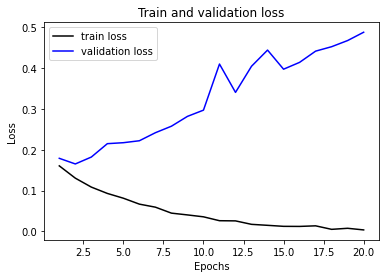

In [22]:
loss = imdb_index["loss"]
val_loss = imdb_index["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "black", label="train loss")
plt.plot(epochs, val_loss, color="blue", label="validation loss")
plt.title("Train and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Best epoch is 2

**Retrain the model m1 with 2 epochs**

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_m1= model.fit(x_train, y_train, epochs=2, batch_size=512)


Epoch 1/2
49/49 [==============================] - 3s 38ms/step - loss: 0.4430 - accuracy: 0.8158
Epoch 2/2
49/49 [==============================] - 1s 30ms/step - loss: 0.2588 - accuracy: 0.9069


**Model m1 test set accuracy**



In [ ]:
results_m1 = model.evaluate(x_test, y_test)
